In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
auto_mpg_dataset_url = "https://drive.google.com/uc?export=download&id=1WhSZll5tDUUl3sFLJMIO01a0d2tQtfc7"
dataset_path = tf.keras.utils.get_file("/content/bike-demand.csv", auto_mpg_dataset_url)

655360/648353 [==============================] - 0s 0us/step


In [3]:
raw_dataset = pd.read_csv('/content/bike-demand.csv')

In [4]:
dataset = raw_dataset.copy()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
drop_columns = ['datetime', 'casual', 'registered']
dataset.drop(drop_columns, axis=1, inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 765.5 KB


In [9]:
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

In [11]:
len(train_data), len(test_data)

(8709, 2177)

In [12]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
6638,1,0,1,1,23.78,27.275,56,7.0015,244
7975,2,0,1,2,27.06,29.545,89,19.0012,239
5915,1,0,1,1,18.86,22.725,55,19.0012,229
8050,2,0,1,1,28.70,31.820,42,11.0014,467
5894,1,0,1,1,22.14,25.760,52,19.0012,335


In [13]:
norm_column = ['temp', 'atemp', 'humidity', 'windspeed']
train_stats = train_data[norm_column].describe()

In [14]:
train_stats

,temp,atemp,humidity,windspeed
count,8709.000000,8709.000000,8709.000000,8709.000000
mean,20.269978,23.698172,62.016535,12.839881
std,7.801503,8.493468,19.266975,8.139981
min,0.820000,0.760000,0.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500
50%,20.500000,24.240000,62.000000,12.998000
75%,26.240000,31.060000,78.000000,16.997900
max,41.000000,45.455000,100.000000,56.996900


In [15]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
temp,8709.0,20.269978,7.801503,0.82,13.9400,20.500,26.2400,41.0000
atemp,8709.0,23.698172,8.493468,0.76,16.6650,24.240,31.0600,45.4550
humidity,8709.0,62.016535,19.266975,0.00,47.0000,62.000,78.0000,100.0000
windspeed,8709.0,12.839881,8.139981,0.00,7.0015,12.998,16.9979,56.9969


In [16]:
train_label = train_data.pop('count')
test_label = test_data.pop('count')

In [17]:
def normal(x):
  return ( x - train_stats['mean'] ) / train_stats['std']

In [18]:
train_data[norm_column] = normal(train_data[norm_column])
test_data[norm_column] = normal(test_data[norm_column])

In [19]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6638,1,0,1,1,0.449916,0.421127,-0.312272,-0.717247
7975,2,0,1,2,0.870348,0.688391,1.400504,0.756921
5915,1,0,1,1,-0.180732,-0.114579,-0.364174,0.756921
8050,2,0,1,1,1.080564,0.956244,-1.038904,-0.225858
5894,1,0,1,1,0.239700,0.242755,-0.519881,0.756921


In [20]:
from tensorflow.keras import models, layers

In [22]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(len(train_data.keys()), )),
  layers.Dense(32, activation='relu'),
  layers.Dense(1)
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

In [25]:
history = model.fit(train_data, train_label, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
436/436 [==============================] - 1s 2ms/step - loss: 40793.9336 - mae: 143.3221 - val_loss: 27464.8652 - val_mae: 122.8932
Epoch 2/100
436/436 [==============================] - 1s 1ms/step - loss: 24285.2793 - mae: 116.9887 - val_loss: 26784.1777 - val_mae: 117.7511
Epoch 3/100
436/436 [==============================] - 1s 1ms/step - loss: 23879.4746 - mae: 114.8718 - val_loss: 26557.6641 - val_mae: 119.8023
Epoch 4/100
436/436 [==============================] - 1s 1ms/step - loss: 23769.4082 - mae: 114.6934 - val_loss: 26616.6660 - val_mae: 121.1304
Epoch 5/100
436/436 [==============================] - 0s 1ms/step - loss: 23700.3613 - mae: 114.6962 - val_loss: 26450.9004 - val_mae: 117.9759
Epoch 6/100
436/436 [==============================] - 1s 1ms/step - loss: 23618.0898 - mae: 114.0753 - val_loss: 26313.4629 - val_mae: 118.0629
Epoch 7/100
436/436 [==============================] - 1s 1ms/step - loss: 23611.7031 - mae: 114.5374 - val_loss: 26267.8574 - val

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

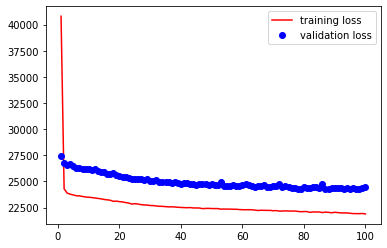

In [28]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'r', label='training loss')
plt.plot(epochs, val_loss, 'bo', label='validation loss')
plt.legend()

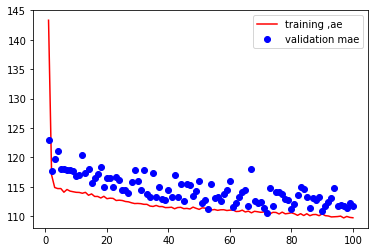

In [29]:
plt.plot(epochs, mae, 'r', label='training ,ae')
plt.plot(epochs, val_mae, 'bo', label='validation mae')
plt.legend()

In [30]:
model.evaluate(x=test_data, y=test_label)

69/69 [==============================] - 0s 985us/step - loss: 22092.7734 - mae: 107.8078


[22092.7734375, 107.80780029296875]